In [1]:
import os
import numpy as np
import pandas as pd

import librosa

import matplotlib.pyplot as plt

In [3]:
# Paso 1: Leer el archivo CSV
df = pd.read_csv('../ESC-50/meta/esc50.csv')

# Paso 2: Filtrar las filas y quitar las columnas no deseadas
categorias_nodeseadas = ['chirping_birds', 'rooster', 'hen', 'crow']
filas_filtradas = df[~df['category'].isin(categorias_nodeseadas)][['filename', 'category']]

# Paso 3: Modificar el valor de la columna "filename"
filas_filtradas['filename'] = 'esc50/' + filas_filtradas['filename']

In [6]:
# Paso 4: Guardar el archivo CSV
filas_filtradas.to_csv('../ESC-50/meta/esc50_filtered.csv', index=False)

In [2]:
def create_spectrogram(audio_file):
    y, sr = librosa.load(audio_file, sr=None)
    
    # Create the output path for the image
    output_image_path = audio_file.replace('audio', 'images').replace(".wav", ".PNG")
    
    # Ensure the output folder exists
    os.makedirs(os.path.dirname(output_image_path), exist_ok=True)
    
    # Define the frequency range
    fmin = 1  # Minimum frequency (0 Hz)
    fmax = 16000  # Maximum frequency (32000 Hz)

    fig, ax = plt.subplots(figsize=(12, 6))  # Set the background color to black
    D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis="time", y_axis="log", fmin=fmin, fmax=fmax, ax=ax)  # Specify frequency range
    ax.axis('off')  # Remove axes

    # Save the figure using the output_image_path
    fig.savefig(output_image_path, bbox_inches='tight', pad_inches=0, transparent=True)
    
    # Close the figure to release memory resources
    plt.close(fig)

# Recursively iterate through all subdirectories and audio files
for root, _, files in os.walk("../ESC-50/audio"):
    for file in files:
        if file.endswith('.wav'):
            audio_file = os.path.join(root, file)
            output_image_path = audio_file.replace('audio', 'images').replace(".wav", ".PNG")
            if not os.path.exists(output_image_path): # Skip if the image already exists
                try:
                    create_spectrogram(audio_file)
                except Exception as e:
                    print(f"An error occurred while processing {audio_file}: {e}")
                    continue

C:\Users\albam\AppData\Local\Temp\ipykernel_26996\797186863.py:15: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)


In [6]:
# Create a txt: train_background.txt with the path of the images of the csv filtered and add at the filename "Data/Dataset/images/"
df = pd.read_csv('../ESC-50/meta/esc50_filtered.csv')
df['filename'] = 'Data/Dataset/images/' + df['filename']
# Replace for each filename the .wav for .PNG
df['filename'] = df['filename'].str.replace('.wav', '.PNG')
df.to_csv('../ESC-50/meta/esc50_filtered.csv', index=False)

In [7]:
# Create a txt: train_background.txt with the path of the images of the df
df.to_csv('../ESC-50/meta/train_background.txt', columns=['filename'], index=False, header=False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el dataset 1:
dataset1 = pd.read_csv('../Data/Dataset/CSVs/train_with_augmented_bg.csv')

# Asumiendo que dataset2 es un archivo CSV, podrías necesitar ajustar el método de lectura si no lo es.
dataset2 = pd.read_csv('../ESC-50/meta/train_background.txt', header=None)

# Filtrar dataset1 para obtener solo aquellos registros que no son "No audio"
dataset1_no_audio = dataset1[dataset1['specie'] == 'No audio']
dataset1_birds = dataset1[dataset1['specie'] != 'No audio']

# Tomar rutas únicas de dataset1 para "No audio" y otros
dataset1_no_audio_paths = dataset1_no_audio['path'].unique()
dataset1_birds_paths = dataset1_birds['path'].unique()

explode = (0, 0, 0.1)  # Resalta la segunda rebanada si lo deseas

# Graficar un gráfico de pastel de la longitud de cada conjunto de datos
fig, ax = plt.subplots(facecolor='none')  # Establecer el fondo del gráfico para que sea transparente
ax.pie([len(dataset1_birds_paths), len(dataset1_no_audio_paths), len(dataset2)], explode=explode, labels=['Dataset (no Background)', 'Dataset Background', 'ESC-50 Dataset'], autopct='%1.1f%%')
ax.set_facecolor('none')  # Establecer el fondo de los ejes para que sea transparente
plt.show()

# Para guardar la figura con un fondo transparente
# fig.savefig('pie_chart_transparent_background.png', transparent=True)

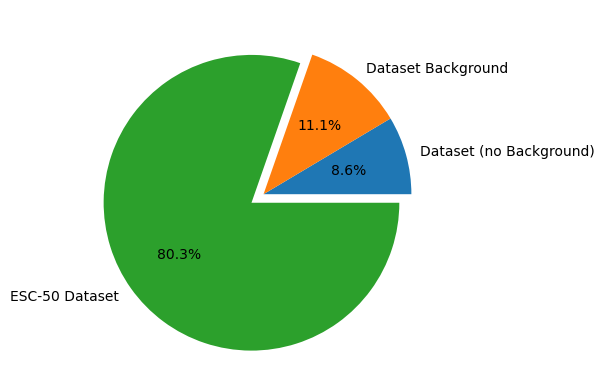

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el dataset 1:
dataset1 = pd.read_csv('../Data/Dataset/CSVs/train_with_augmented_bg.csv')

# Asumiendo que dataset2 es un archivo CSV, podrías necesitar ajustar el método de lectura si no lo es.
dataset2 = pd.read_csv('../ESC-50/meta/train_background.txt', header=None)

# Filtrar dataset1 para obtener solo aquellos registros que no son "No audio"
dataset1_no_audio = dataset1[dataset1['specie'] == 'No audio']
dataset1_birds = dataset1[dataset1['specie'] != 'No audio']

# Tomar rutas únicas de dataset1 para "No audio" y otros
dataset1_no_audio_paths = dataset1_no_audio['path'].unique()
dataset1_birds_paths = dataset1_birds['path'].unique()

explode = (0, 0, 0.1)  # Resalta la segunda rebanada si lo deseas

# Graficar un gráfico de pastel de la longitud de cada conjunto de datos
fig, ax = plt.subplots(facecolor='none')  # Establecer el fondo del gráfico para que sea transparente
ax.pie([len(dataset1_birds_paths), len(dataset1_no_audio_paths), len(dataset2)], explode=explode, labels=['Dataset (no Background)', 'Dataset Background', 'ESC-50 Dataset'], autopct='%1.1f%%')
ax.set_facecolor('none')  # Establecer el fondo de los ejes para que sea transparente
plt.show()

# Para guardar la figura con un fondo transparente
# fig.savefig('pie_chart_transparent_background.png', transparent=True)

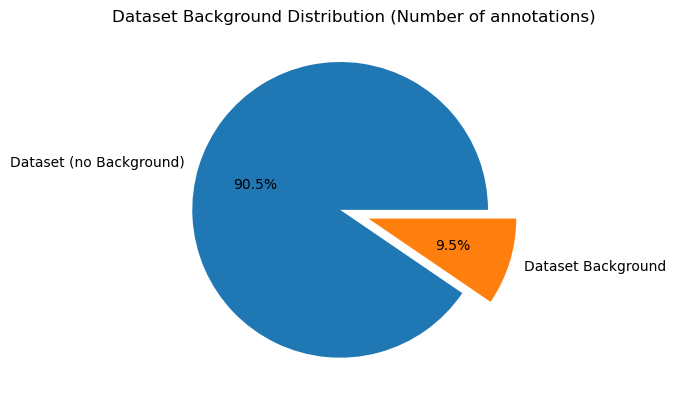

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el dataset 1:
dataset1 = pd.read_csv('../Data/Dataset/CSVs/train_with_augmented_bg.csv')

# Filtrar dataset1 para obtener solo aquellos registros que no son "No audio"
dataset1_no_audio = dataset1[dataset1['specie'] == 'No audio']
dataset1_birds = dataset1[dataset1['specie'] != 'No audio']

# Tomar rutas únicas de dataset1 para "No audio" y otros
# dataset1_no_audio_paths = dataset1_no_audio['path'].unique()
# dataset1_birds_paths = dataset1_birds['path'].unique()

explode = (0.1, 0.1)  # Resalta la segunda rebanada si lo deseas

# Graficar un gráfico de pastel de la longitud de cada conjunto de datos
fig, ax = plt.subplots(facecolor='none')  # Establecer el fondo del gráfico para que sea transparente
ax.pie([len(dataset1_birds), len(dataset1_no_audio)], explode=explode, labels=['Dataset (no Background)', 'Dataset Background'], autopct='%1.1f%%')
ax.set_facecolor('none')  # Establecer el fondo de los ejes para que sea transparente
# Title
plt.title('Dataset Background Distribution (Number of annotations)')
plt.show()

# Para guardar la figura con un fondo transparente
# fig.savefig('pie_chart_transparent_background.png', transparent=True)

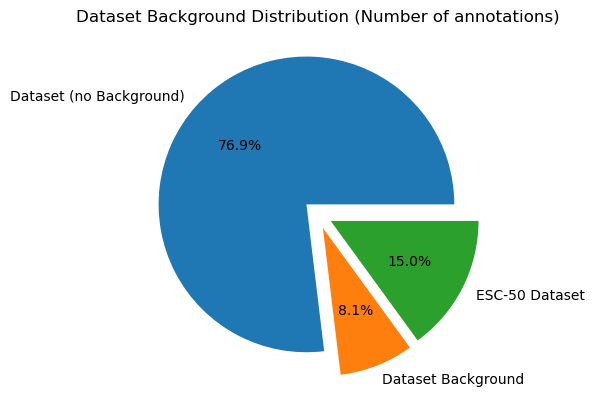

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el dataset 1:
dataset1 = pd.read_csv('../Data/Dataset/CSVs/train_with_augmented_bg.csv')

# Filtrar dataset1 para obtener solo aquellos registros que no son "No audio"
dataset1_no_audio = dataset1[dataset1['specie'] == 'No audio']
dataset1_birds = dataset1[dataset1['specie'] != 'No audio']

# Tomar rutas únicas de dataset1 para "No audio" y otros
# dataset1_no_audio_paths = dataset1_no_audio['path'].unique()
# dataset1_birds_paths = dataset1_birds['path'].unique()

explode = (0.1, 0.1, 0.1)  # Resalta la segunda rebanada si lo deseas

# Graficar un gráfico de pastel de la longitud de cada conjunto de datos
fig, ax = plt.subplots(facecolor='none')  # Establecer el fondo del gráfico para que sea transparente
ax.pie([len(dataset1_birds), len(dataset1_no_audio), 470], explode=explode, labels=['Dataset (no Background)', 'Dataset Background', 'ESC-50 Dataset'], autopct='%1.1f%%')
ax.set_facecolor('none')  # Establecer el fondo de los ejes para que sea transparente
plt.title('Dataset Background Distribution (Number of annotations)')
plt.show()

# Para guardar la figura con un fondo transparente
# fig.savefig('pie_chart_transparent_background.png', transparent=True)